<h3><font color='blue'>===============================================</font></h3>
<h2>Logistic Regression</h2>
<br>
<ul>
<li>Supervised Learning algorithm</li>
<li>We have to predict whether an example is an instance of a class or not</li>
<li>We will use the sigmoid function whose range stays between 0 and 1</li>
<li>We will understand the cost function for logistic regression as a sum of the costs for 
the two scenarios - when the example is positive - the 1 cost - and when it is not - the zero cost</li>
<li>We will apply logistic regression to classify messages as ham or spam</li>
<li>For doing that we will first figure out how to build our feature set</li>
<li>We will look at how to vectorize sentences and build a dictionary corpus</li>
<li>We will then have a wide feature set and every message will be an example, a vector which will have a 
positive value for some features and a blank, 0 for most</li>
<li>We will investigate the scikit, python structures for efficient sparse vectors and matrices representation</li>
<li>We will then apply logistic regression to build the spam classifier</li>
</ul>
<br>
<h3><font color='blue'>===============================================</font></h3>

In [1]:
# Lets load some of the libraries
%pylab inline
from scipy.special import expit, logit
import scipy.sparse as sp
from math import sqrt, log
import numpy as np

Populating the interactive namespace from numpy and matplotlib


<h3><font color='blue'>===============================================</font></h3>
<h2>Logistic Regression</h2>
<h4>Our hypothesis should satisfy:</h4>

<h4>$0≤h_θ(x)≤1$</h4>

<h4>We will use the "Sigmoid Function," also called the "Logistic Function":</h4>

<h4>$h_θ(x)=g(θ^Tx)$</h4>
<h4>$z=θ^Tx$</h4>
<h4>$g(z)= \dfrac {1}{1+e^{-z}}$</h4>
<h4>The Sigmoid/Logistic function has a range of 0 to 1 for all values of x</h4>
<h3><font color='blue'>===============================================</font></h3>


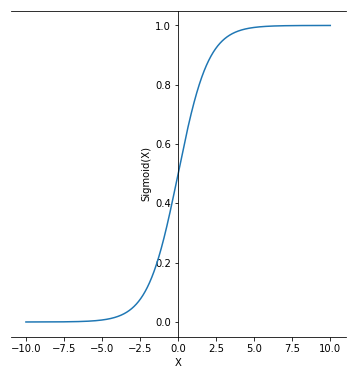

In [2]:
# Lets draw the sigmoid function
fig = figure()
x = np.linspace(-10,10,5000)
y =  1 / ( 1 + np.exp(-x))
ax = plt.gca()
plt.xlabel('X')
plt.ylabel('Sigmoid(X)')
plt.plot(x,y)
ax.spines['right'].set_color('none')
ax.spines['left'].set_position( ('data',0) )
# ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_position( ('data',0.5) )
fig.set_size_inches(6,6)

<h3><font color='blue'>===============================================</font></h3>
<h5>We start with our old hypothesis (linear regression), except that we want to restrict the range to 0 and 1. This is accomplished by plugging $θ^Tx$ into the Logistic Function</h5>

<h5>$h_θ$  will give us the probability that our output is 1. For example, hθ(x)=0.7 gives us the probability of 70% that our output is 1</h5>

<h4>$h_θ(x)=P(y=1|x ;θ)=1−P(y=0|x ;θ)$</h4>
<h4>$P(y=0|x;θ)+P(y=1|x ;θ)=1$</h4>

<h4>Decision boundary:</h4>
<h4>It is the line that separates the area where y = 0 from where y = 1 and we consider probability less than 0.5 to equal the 0 case and greater to equal the 1 case</h4>

<p>We can compress our cost function's two conditional cases into one case:
<br><br>
$Cost(h_θ(x),y)=−ylog(h_θ(x))−(1−y)log(1−h_θ(x))$
<br><br>
Notice that when y is equal to 1, then the second term ((1−y)log(1−hθ(x))) will be zero and will not affect the result. If y is equal to 0, then the first term (−ylog(hθ(x))) will be zero and will not affect the result</p>

<h4>We can represent the cost function as:</h4>
<h4>$J(θ)=-\ \dfrac {1}{m} \displaystyle \sum _{i=1}^m[y^{(i)}log(h_θ(x^{(i)}))+(1−y^{(i)})log(1−h_θ(x^{(i)}))]$</h4>

A vectorized implementation is:

<h4>$J(θ)=-\ \dfrac {1}{m} (log(g^{{(\theta^TX)}})y+log(1−g^{(\theta^TX)})(1−y))$</h4>
<h3><font color='blue'>===============================================</font></h3>

### Turning text into vectors
### CountVectorizer

In [3]:
# Lets import the text vectorizers
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,HashingVectorizer


In [4]:
# Lets build a corpus of arbitrary sentences and see the count vectorizer in operation
corpus = [
'a bag of words representation in a bag inside a bag',
'what is the bag of words  representation',
    'we are going to explore'
]

In [5]:
# Lets intialize and fit a count vectorizer to our corpus
vectorizer = CountVectorizer()
ourdict = vectorizer.fit_transform(corpus)
print(  '\nWe see that it builds a sparse matrix\n' )
print(  "type of ourdict " + str(type(ourdict) ))
print(  '\nWe check the dense representation to be an array of rows equal to the number of ' )
print(  'sentences in our corpus and columns equal to the total number of unique words ' )
print(  'and a 1 for the words that are in our sentence and a 0 for the rest\n' )
print(  ourdict.todense().shape ,  ourdict.todense() )
print(  '\nThe sparse representation' )
print(  ourdict )


We see that it builds a sparse matrix

type of ourdict <class 'scipy.sparse.csr.csr_matrix'>

We check the dense representation to be an array of rows equal to the number of 
sentences in our corpus and columns equal to the total number of unique words 
and a 1 for the words that are in our sentence and a 0 for the rest

(3, 14) [[0 3 0 0 1 1 0 1 1 0 0 0 0 1]
 [0 1 0 0 0 0 1 1 1 1 0 0 1 1]
 [1 0 1 1 0 0 0 0 0 0 1 1 0 0]]

The sparse representation
  (0, 5)	1
  (0, 4)	1
  (0, 8)	1
  (0, 13)	1
  (0, 7)	1
  (0, 1)	3
  (1, 9)	1
  (1, 6)	1
  (1, 12)	1
  (1, 8)	1
  (1, 13)	1
  (1, 7)	1
  (1, 1)	1
  (2, 2)	1
  (2, 10)	1
  (2, 3)	1
  (2, 0)	1
  (2, 11)	1


In [6]:
# The vocabulary built is a dictionary
print ( vectorizer.vocabulary_, len(vectorizer.vocabulary_))
print(sorted( vectorizer.vocabulary_.items(), key = lambda x : x[1]))

{'bag': 1, 'of': 7, 'words': 13, 'representation': 8, 'in': 4, 'inside': 5, 'what': 12, 'is': 6, 'the': 9, 'we': 11, 'are': 0, 'going': 3, 'to': 10, 'explore': 2} 14
[('are', 0), ('bag', 1), ('explore', 2), ('going', 3), ('in', 4), ('inside', 5), ('is', 6), ('of', 7), ('representation', 8), ('the', 9), ('to', 10), ('we', 11), ('what', 12), ('words', 13)]


In [7]:
# Lets compare the sentences based on the count of the number of words in the sentences
counts = vectorizer.fit_transform(corpus)
counts.todense()

matrix([[0, 3, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1],
        [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]], dtype=int64)

In [8]:
# Lets see the distances between the pairs of sentences
from sklearn.metrics.pairwise import euclidean_distances
print('%.2f' %  euclidean_distances( counts[0], counts[1])  )
print('%.2f' %  euclidean_distances( counts[0], counts[2])  )
print('%.2f' % (euclidean_distances( counts[2], counts[1])  ))
print('%.2f' % (euclidean_distances( counts[0], counts[0])  ))

3.00
4.36
3.46
0.00


In [9]:
def tokenizer(text):
    return [w for w in text.split()]
tokenizer( 'some text for    processing' )

['some', 'text', 'for', 'processing']

<h3><font color='blue'>===============================================</font></h3>
<h4>TfIDF representation</h4>
<ul>
<li>Tf - Term frequency - the number of times a word occurs in a sentence/document/text vector. More the number of times it occurs, more important it is. Two documents having similar term freuqency are likely to be more similar</li>
<li>Idf - Inverse document frequency. Total number of documents / No of documents in which the word occurs. The rarer a word is, the more weight it should carry in pronouncing similarity of two documents - for our understanding here - the sentences are the documents and the array of sentences the corpus</li>
<li>Tfidf - The product of Tf and Idf </li>
</ul>
</h4>
<h3><font color='blue'>===============================================</font></h3>

## Tf-idf  formula in scikit learn
$idf(t,d)= log \dfrac{1+n_d}{ 1 + df(d,t)}$<br><br>
where $n_d$ = number of documents in the corpus<br><br>
and df(d,t) = number of documetns in which the term t appears<br><br>
$tf-idf(t,d)=tf(t,d) * (idf(t,d) + 1 )$

In [10]:
# Lets build a dummy new corpus purposely repeating some words across documents to understand tfidf
ncorpus = [
    'simple bag words bag words bag words',
    'another bag words',
    'complex bag words',
    'complex trick demo',
    'new new trick demo'
]

In [11]:
# Lets calculate the tfidfs for the first sentence
# Term frequency - simple - 1, bag - 3, words -3 
idfsimple = np.log( (1+5)/(1+1))
tfidfsimple = 1 * ( idfsimple + 1 )
print('{0:.2f}'.format(tfidfsimple))

idfbag = np.log( (1+5) / ( 1 + 3 ) )
tfidfbag = 3 * ( idfbag + 1 )
print('{0:.2f}'.format(tfidfbag))

idfwords = np.log( (1+5) / ( 1 + 3 ) )
tfidfwords = 3 * ( idfwords + 1 )
print('{0:.2f}'.format(tfidfwords))

2.10
4.22
4.22


In [12]:
# Lets initialize a tfidfvectorizer - we will currently leave out normalization
ntfidfvect = TfidfVectorizer(norm=False)
print ( type(ntfidfvect) )

<class 'sklearn.feature_extraction.text.TfidfVectorizer'>


In [13]:
# Lets get the output of a fit_transform operation which is a numpy matrx
np.set_printoptions(precision=3)
ntfidfmat = ntfidfvect.fit_transform(ncorpus)
print(  '\nThe type of the result of a tfidf fit_transform operation and \
the sparse matrix produced\n' )
print(  type( ntfidfmat),'\nand the matrix itself\n',ntfidfmat )
print(  '\nThe vocabulary dictionary\n' )
print( sorted( ntfidfvect.vocabulary_.items() , key = lambda x : x[1]))
# Lets get the dens form of the matrix
finmat = ntfidfmat.todense()
# Lets see the shape and the dense matrix

print  ('\nThe shape of the dense matrix\n', finmat.shape , 
        '\nThe dense matrix\n', finmat )
# We can verify the tfidfs generated for the first sentence
# are the same as the ones we calculated earlier


The type of the result of a tfidf fit_transform operation and the sparse matrix produced

<class 'scipy.sparse.csr.csr_matrix'> 
and the matrix itself
   (0, 5)	2.09861228867
  (0, 1)	4.21639532432
  (0, 7)	4.21639532432
  (1, 1)	1.40546510811
  (1, 7)	1.40546510811
  (1, 0)	2.09861228867
  (2, 1)	1.40546510811
  (2, 7)	1.40546510811
  (2, 2)	1.69314718056
  (3, 2)	1.69314718056
  (3, 6)	1.69314718056
  (3, 3)	1.69314718056
  (4, 6)	1.69314718056
  (4, 3)	1.69314718056
  (4, 4)	4.19722457734

The vocabulary dictionary

[('another', 0), ('bag', 1), ('complex', 2), ('demo', 3), ('new', 4), ('simple', 5), ('trick', 6), ('words', 7)]

The shape of the dense matrix
 (5, 8) 
The dense matrix
 [[ 0.     4.216  0.     0.     0.     2.099  0.     4.216]
 [ 2.099  1.405  0.     0.     0.     0.     0.     1.405]
 [ 0.     1.405  1.693  0.     0.     0.     0.     1.405]
 [ 0.     0.     1.693  1.693  0.     0.     1.693  0.   ]
 [ 0.     0.     0.     1.693  4.197  0.     1.693  0.   ]]


In [14]:
# Lets also check out the normalized tfidf vectorization which is the default.
# The computed scores # for each vector are divided by the l2 norm
# of the vector
np.set_printoptions(precision=3)
normtfidfvect = TfidfVectorizer()
normtfidfmat = normtfidfvect.fit_transform(ncorpus)
print ( normtfidfmat.todense() )

[[ 0.     0.667  0.     0.     0.     0.332  0.     0.667]
 [ 0.726  0.486  0.     0.     0.     0.     0.     0.486]
 [ 0.     0.538  0.648  0.     0.     0.     0.     0.538]
 [ 0.     0.     0.577  0.577  0.     0.     0.577  0.   ]
 [ 0.     0.     0.     0.35   0.869  0.     0.35   0.   ]]


In [15]:
# quickly verify the normalized calculations
# find the l2 norm for the first vector square root of the sum of the squares
# of the elements
l2normfr= sqrt(sum( x*x.T for x in ntfidfmat.todense()[0]))
print(l2normfr)
# divide each element by the l2 norm
print(ntfidfmat.todense()[0]/l2normfr)

6.321404321835433
[[ 0.     0.667  0.     0.     0.     0.332  0.     0.667]]


 <h3><font color='blue'>===============================================</font></h3>
 <h4>Let us load the messages data</h4>
 <h3><font color='blue'>===============================================</font></h3>

In [16]:
import pandas as pd
df = pd.read_csv('sms.csv')
print( df.head())
print( 'No of ham messages %d' %  df[df['label'] == 0]['label'].count())
print( 'No of spam messages %d' % df[df['label'] ==1]['label'].count())

   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...
No of ham messages 4827
No of spam messages 747


In [17]:
import nltk
import string
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Samar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Samar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
astring = '''some ## $$  % demo, string, with : punctuation; can't'''
''.join(x for x in astring if x not in string.punctuation).split()

['some', 'demo', 'string', 'with', 'punctuation', 'cant']

In [19]:
import re
from nltk.corpus import stopwords
def message_to_words(message,bln_stemmed):
    letters_only = re.sub("[^a-zA-z]", " ",message)
    letters_only = ''.join(x for x in letters_only 
                           if x not in string.punctuation)
    words = letters_only.lower().split()
    stops = set(stopwords.words('english'))
    meaningful_words = [ w for w in words if w not in stops and len(w) > 1]
    stemmer = PorterStemmer()
    meaningful_words_stemmed = [ stemmer.stem(w) for w in meaningful_words]
    return " ".join(meaningful_words_stemmed) if bln_stemmed == True else " ".join(meaningful_words)
print(df['message'][0])
print(message_to_words(df['message'][0],False))
print(message_to_words(df['message'][0],True))

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
go jurong point crazy available bugis great world la buffet cine got amore wat
go jurong point crazi avail bugi great world la buffet cine got amor wat


In [20]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
messages_cleaned = []
messages_cleaned_and_stemmed = []
no_of_messages = df['message'].size
print(no_of_messages)
for x in range(0,no_of_messages):
    messages_cleaned.append(message_to_words(df['message'][x],False))
    messages_cleaned_and_stemmed.append(message_to_words(df['message'][x],True))
print(len(messages_cleaned))
print(len(messages_cleaned_and_stemmed))

5574
5574
5574


In [22]:
# let us take a look at the total length and the largest length
# of messages in the two sets we created
print(sum(len(x) for x in df['message']))
print( sum(len(x) for x in messages_cleaned))
print(max( [len(x) for x in messages_cleaned ] ))
print( sum(len(x) for x in messages_cleaned_and_stemmed))
print(max( [len(x) for x in messages_cleaned_and_stemmed ] ))

448526
273101
447
252285
412


In [23]:
# let us look at the longest sentence
from functools import reduce
longest_message = reduce(lambda x,y : x if len(x) > len(y)  else y,
                         messages_cleaned_and_stemmed)
print(longest_message)
len(longest_message)

love start attract feel need everi time around first thing come thought would start day end everi time dream love everi breath name life happen around life name would cri give happi take sorrow readi fight anyon love craziest thing love proov anyon girl beauti ladi whole planet alway sing prais love start make chicken curri end maki sambar life beauti get everi morn thank god day would like say lot tell later


412

In [24]:
# total number of words afte cleaning, stemming, tokenizing

# print( set( [ y for x in messages_cleaned for y in x.split(' ')] ))
print(type(messages_cleaned),len(messages_cleaned))

print( len(set( [ y for x in messages_cleaned for y in x.split()] )) )
# print( set( [ y for x in messages_cleaned_and_stemmed for y in x.split(' ')] ))
print( len(set( [ y for x in messages_cleaned_and_stemmed for y in x.split()] )) )

<class 'list'> 5574
7618
6291


In [25]:
# take a look at the tokens generated
messages_cleaned_tokens = set( [ y for x in messages_cleaned 
                                for y in x.split()] )
mctlist = sorted(messages_cleaned_tokens)
mctlist[:10]

['aa',
 'aah',
 'aaniye',
 'aaooooright',
 'aathi',
 'ab',
 'abbey',
 'abdomen',
 'abeg',
 'abel']

<h3><font color='blue'>===============================================</font></h3>
<h4>Let us vectorize the dataset build a term document matrix and apply logistic regression classifier</h4>
<h3><font color='blue'>===============================================</font></h3>

In [26]:
# before going for train, test split let us check if there
# is agreement between numbere of tokens generated by the vectorizer
# and what we found for messages_cleaned above
allvectorier = TfidfVectorizer()
X_all = allvectorier.fit_transform(messages_cleaned)
print(X_all.shape)
allvectvocab = sorted(allvectorier.vocabulary_)
# [x for x in mctlist if x not in allvectvocab ]

(5574, 7618)


In [27]:
# Let us prepate the data for the classifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    messages_cleaned,df['label'],random_state=1000)
# X_train_raw_clean = message_to_words(X_train_raw)
# print(X_train_raw.shape,X_test_raw.shae)
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
print ( '\nThe type of structure generated by vectorizer.fit_transform\
and the shape\n',type(X_train), X_train.shape )
print('\nThe shape of the test set ', X_test.shape)
print ( '\nThe first training sample\n',X_train[0] )
print ( '\nThe first test sample\n', X_test[0] )
print ( '\nThe vectorizer vocabulary dictionary first one hundred elements\n',
     [x for x in sorted(vectorizer.vocabulary_.items())[:100]])
print ( '\nThe size of the vectorizer vocabulary\n',
       len(vectorizer.vocabulary_) )


The type of structure generated by vectorizer.fit_transformand the shape
 <class 'scipy.sparse.csr.csr_matrix'> (4180, 6500)

The shape of the test set  (1394, 6500)

The first training sample
   (0, 2833)	0.341345835914
  (0, 5170)	0.435676008944
  (0, 5623)	0.380311030443
  (0, 5838)	0.380311030443
  (0, 2136)	0.337611136851
  (0, 982)	0.435676008944
  (0, 5251)	0.317177570592

The first test sample
   (0, 5953)	0.68452576594
  (0, 5560)	0.417444073538
  (0, 3884)	0.363774668929
  (0, 840)	0.474165489548

The vectorizer vocabulary dictionary first one hundred elements
 [('aa', 0), ('aah', 1), ('aaooooright', 2), ('aathi', 3), ('abeg', 4), ('aberdeen', 5), ('abi', 6), ('ability', 7), ('abiola', 8), ('abj', 9), ('able', 10), ('aboutas', 11), ('absence', 12), ('absolutely', 13), ('abstract', 14), ('abt', 15), ('abta', 16), ('aburo', 17), ('abuse', 18), ('abusers', 19), ('ac', 20), ('academic', 21), ('acc', 22), ('accent', 23), ('accenture', 24), ('accept', 25), ('access', 26), ('access

In [28]:
print ( X_train.shape  )
print ( X_test.shape  )
print ( y_train.shape  )
print ( y_test.shape  )
print ( type(X_test_raw)  )

(4180, 6500)
(1394, 6500)
(4180,)
(1394,)
<class 'list'>


In [29]:
[x for x in enumerate(range(8,12))]

[(0, 8), (1, 9), (2, 10), (3, 11)]

In [30]:
al = [3,2,4]
bl = [1,2,3]
cl = [9,10,'a']
[ x for x in zip(al,bl,cl)]

[(3, 1, 9), (2, 2, 10), (4, 3, 'a')]

In [31]:
# Lets fit LogisticRegression and check messages, labels and predictions
from sklearn.linear_model.logistic import LogisticRegression
classifier = LogisticRegression(random_state=1)
classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)
predict_prob = classifier.predict_proba(X_test)

# let us take a look at the message, label, prediction and prediction 
# probability
for i, prediction in enumerate(predictions[:5]):
    print ( 'Message: ', X_test_raw[i],'label: ', y_test.iloc[i],
           'prediction: ', predictions[i],'probability',predict_prob[i] ) 

# find the total number of inaccurate predictions
print('Total differing predictions ',
      len([x for x in zip(y_test,predictions) if x[0] != x[1]]))

# Take a look at messages where spam has been classified right
# print('\nSpam classified right:\n')
# print('\n'.join([ str(x) for x in 
#  zip(X_test_raw,y_test,predictions,predict_prob)
#  if x[1] == x[2] and x[1] == 1][:3] ))

# Take a look at messages where we have differences
# print('\nSpam classified wrong:\n')
# print([x for x in zip(X_test_raw,y_test,predictions,predict_prob)
#  if x[1] != x[2]][:5])

Message:  ok take care umma label:  0 prediction:  0 probability [ 0.977  0.023]
Message:  wanna gym label:  0 prediction:  0 probability [ 0.915  0.085]
Message:  st andre virgil cream label:  0 prediction:  0 probability [ 0.895  0.105]
Message:  opinion jada kusruthi lovable silent spl character matured stylish simple pls reply label:  0 prediction:  0 probability [ 0.916  0.084]
Message:  hey project started aha da label:  0 prediction:  0 probability [ 0.973  0.027]
Total differing predictions  49


<h3><font color='blue'>=================================================================================</font></h3>
<h2><font color='indigo'>Classification Metrics<br>
$Precision=\dfrac {TP}{TP+FP}$ , $Recall=\dfrac {TP}{TP+FN}$<br>
$F1=\dfrac {2PR}{P+R}$<br><br>
Sensitivity = True Positive Rate = Recall<br><br>
Specificity = True Negative Rate = $ \dfrac {TN}{TN+FP} $<br><br>
False Positive Rate = 1 - Specificity = $ \dfrac{FP}{TN+FP}$<br><br>
ROC - Receiver Operating Characteristics - plots 1-specificity i.e FPR against sensitivity i.e TPR<br><br>
Sample output from one of the runs</font></h2>
<table cellspacing="0" border="0">
	<colgroup width="24"></colgroup>
	<colgroup width="62"></colgroup>
	<colgroup width="49"></colgroup>
	<colgroup width="62"></colgroup>
	<colgroup width="100"></colgroup>
	<colgroup width="64"></colgroup>
	<colgroup width="93"></colgroup>
	<tr>
		<td height="26" align="left"><font size=4><br></font></td>
		<td align="right" sdval="0" sdnum="16393;"><font size=4>0</font></td>
		<td align="right" sdval="1" sdnum="16393;"><font size=4>1</font></td>
		<td align="left"><font size=4><br></font></td>
		<td align="left"><font size=4>precision</font></td>
		<td align="left"><font size=4>recall</font></td>
		<td align="left"><font size=4>f1-score</font></td>
	</tr>
	<tr>
		<td height="26" align="right" sdval="0" sdnum="16393;"><font size=4>0</font></td>
		<td align="right" sdval="1194" sdnum="16393;"><font size=4>1194</font></td>
		<td align="right" sdval="48" sdnum="16393;"><font size=4>48</font></td>
		<td align="right" sdval="1242" sdnum="16393;"><font size=4>1242</font></td>
		<td align="right" sdval="0.996661101836394" sdnum="16393;0;0.00"><font size=4>1.00</font></td>
		<td align="right" sdval="0.961352657004831" sdnum="16393;0;0.00"><font size=4>0.96</font></td>
		<td align="right" sdval="0.978688524590164" sdnum="16393;0;0.00"><font size=4>0.98</font></td>
	</tr>
	<tr>
		<td height="26" align="right" sdval="1" sdnum="16393;"><font size=4>1</font></td>
		<td align="right" sdval="4" sdnum="16393;"><font size=4>4</font></td>
		<td align="right" sdval="148" sdnum="16393;"><font size=4>148</font></td>
		<td align="right" sdval="152" sdnum="16393;"><font size=4>152</font></td>
		<td align="right" sdval="0.755102040816326" sdnum="16393;0;0.00"><font size=4>0.76</font></td>
		<td align="right" sdval="0.973684210526316" sdnum="16393;0;0.00"><font size=4>0.97</font></td>
		<td align="right" sdval="0.850574712643678" sdnum="16393;0;0.00"><font size=4>0.85</font></td>
	</tr>
	<tr>
		<td height="26" align="left"><font size=4><br></font></td>
		<td align="right" sdval="1198" sdnum="16393;"><font size=4>1198</font></td>
		<td align="right" sdval="196" sdnum="16393;"><font size=4>196</font></td>
		<td align="right" sdval="1394" sdnum="16393;"><font size=4>1394</font></td>
		<td align="left"><font size=4><br></font></td>
		<td align="left"><font size=4><br></font></td>
		<td align="left"><font size=4><br></font></td>
	</tr>
</table>

<h3><font color='blue'>=================================================================================</font></h3>

[[1212    3]
 [  46  133]]


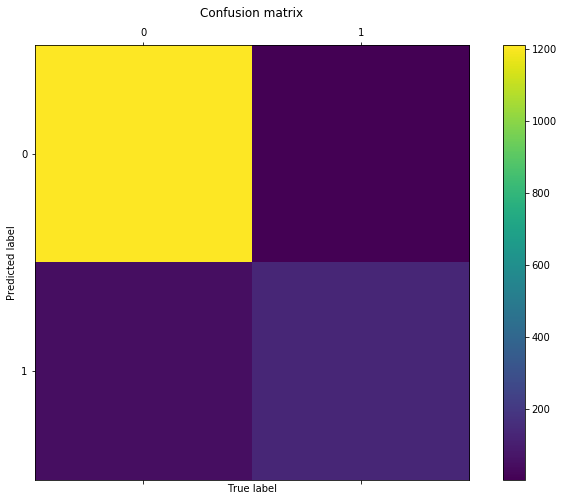

In [32]:
# Lets plot the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cmatrix = confusion_matrix(y_test, predictions)
print(cmatrix)
fig = figure()
ax = gca()
cax = ax.matshow(cmatrix)
plt.title('Confusion matrix')
fig.colorbar(cax)
plt.ylabel('Predicted label')
plt.xlabel('True label')
fig.set_size_inches(12,8)

<h3><font color='blue'>===============================================</font></h3>
<h1>Overfitting - variance, Underfitting - bias and Regularization</h1>
<h4>We may find that our model performs well on training data and not so well on test and new data</h4>
<h4>In machine learning parlance this means that the model has been excessively specialized to account for all the variance in the data. Hence the model has high variance.</h4>
<h4>To address variance we may penalize the learning parameters - by adding some penalty term for each of the parameter - what we are doing is effectively toning down the impact of the parameter</h4>
<h4>Thus we may refine our cost function as:</h4>
<h4>$J(θ)=−\dfrac{1}{m}\displaystyle \sum _{i=1}^m \; [y^{(i)} log(h_θ^{(x^{(i)})})+(1−y^{(i)}) log(1−h_θ^{(x^{(i)})})]+ \dfrac {λ}{2m}\displaystyle \sum_{j=1}^nθ_j^2$</h4>
<h4>Here the last term is the regularization penalization which is adding the square of the parameter coefficients</h4>
<h4>In scikit this is the L2 regularization by default included in the LogisticRegression class</h4>
<h4>The converse case where the model underfits the data in machine learning language is called bias</h4>
<h4>Lets take a look at the actions we can take to redress the situation we are facing</h4>
<table cellspacing="0" border="0">
	<colgroup width="133"></colgroup>
	<colgroup width="222"></colgroup>
	<colgroup width="326"></colgroup>
	<tr>
		<td height="17" align="left" valign=top>Action</td>
		<td align="left" valign=top>Effect</td>
		<td align="left" valign=top>Logic</td>
	</tr>
	<tr>
		<td height="17" align="left" valign=top><br></td>
		<td align="left" valign=top><br></td>
		<td align="left" valign=top><br></td>
	</tr>
	<tr>
		<td height="17" align="left" valign=top>More features</td>
		<td align="left" valign=top>Addresses High  Bias, Underfitting</td>
		<td align="left" valign=top>More elaborate descriptions tell us more about objects</td>
	</tr>
	<tr>
		<td height="32" align="left" valign=top>Less features</td>
		<td align="left" valign=top>Addresses High Variance, Overfitting</td>
		<td align="left" valign=top>Converse of the more features case</td>
	</tr>
	<tr>
		<td height="47" align="left" valign=top>Add regularization penalty</td>
		<td align="left" valign=top>Addresses High Variance, Overfitting </td>
		<td align="left" valign=top>we are diluting the impact of parameters – setting it extremely high will negate the effect of parameters alltogether</td>
	</tr>
	<tr>
		<td height="32" align="left" valign=top>Reduce/remove regularization penalty</td>
		<td align="left" valign=top>Addresses High  Bias, Underfitting</td>
		<td align="left" valign=top>Converse of above – we want to qualify features with parameters to attain fitting</td>
	</tr>
	<tr>
		<td height="47" align="left" valign=top>More examples</td>
		<td align="left" valign=top>Fixes high variance</td>
		<td align="left" valign=top>The learning will be more evenly spread across a wider range of attributes – making it more representative</td>
	</tr>
	<tr>
		<td height="62" align="left" valign=top>Higher degree features</td>
		<td align="left" valign=top>Fixes high bias</td>
		<td align="left" valign=top>We are hairsplitting the data finer and finer – we may be able to demarcate non linear boundaries – however we will need to use it judiciously – we do not want to be saddled with a high variance situation</td>
	</tr>
</table>
<h3><font color='blue'>===============================================</font></h3>

In [47]:
# let us see some messages, transform them and use the classifier
# to calculate probabilities
print(messages_cleaned[:2])
df[df.label == 0][:2]

['go jurong point crazy available bugis great world la buffet cine got amore wat', 'ok lar joking wif oni']


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [48]:

tfmat = vectorizer.transform(
    [message_to_words(' Go until jurong point, crazy.. Available only ...',
                      False)])
print( tfmat)
print(tfmat.todense()[0])
classifier.predict_proba(tfmat)

  (0, 4218)	0.459848697656
  (0, 2900)	0.572799681567
  (0, 2262)	0.265396974405
  (0, 1217)	0.443870095466
  (0, 382)	0.439298855438
[[ 0.  0.  0. ...,  0.  0.  0.]]


array([[ 0.934,  0.066]])

In [49]:
# Lets apply the logistic regression formula to get the probability 
# for the test examples and see the labels and predictions
print (classifier.coef_, type( classifier.coef_ ),classifier.coef_.shape)
print (X_test.shape, X_test[0].shape)
for x in range(3):
    proba = '%.3f' % expit(X_test[x].dot(classifier.coef_.T)+classifier.intercept_)
    print ( '\n','Message:',X_test_raw[x], 'proba', proba, 
            'classifier probabilities ', predict_prob[x], 'Label: ',y_test.iloc[x],
           'Predicted:', predictions[x] )



[[-0.015 -0.056 -0.037 ..., -0.011  0.231  0.099]] <class 'numpy.ndarray'> (1, 6500)
(1394, 6500) (1, 6500)

 Message: ok take care umma proba 0.023 classifier probabilities  [ 0.977  0.023] Label:  0 Predicted: 0

 Message: wanna gym proba 0.085 classifier probabilities  [ 0.915  0.085] Label:  0 Predicted: 0

 Message: st andre virgil cream proba 0.105 classifier probabilities  [ 0.895  0.105] Label:  0 Predicted: 0


In [50]:
#k-fold cross validation
# the sample is divided into k folds that is if sample is 100 and k folds are 5
# we will divide into subsamples of 20 each
# the subsamples will be created randomly 
# Lets check the scores running k fold cross validations

from sklearn.model_selection import cross_val_score
scores = cross_val_score( classifier, X_train, y_train, cv=5)
print ( np.mean(scores),scores )

0.952629522728 [ 0.957  0.955  0.949  0.958  0.945]


In [51]:
# Lets check for precision
precisions = cross_val_score( classifier, X_train, y_train, cv=5, scoring='precision')
print ( np.mean(precisions),precisions )

0.982218866105 [ 0.964  0.975  0.986  1.     0.986]


In [52]:
# For recall
recalls = cross_val_score( classifier, X_train, y_train, cv=5, scoring='recall')
print ( np.mean(recalls),recalls )

0.663670237541 [ 0.711  0.684  0.632  0.69   0.602]


In [53]:
# For f1
f1s = cross_val_score( classifier, X_train, y_train, cv=5,scoring='f1')
print ( np.mean(f1s),f1s )

0.791273135882 [ 0.818  0.804  0.77   0.817  0.747]


<h3><font color='blue'>===============================================</font></h3>
<h4>The ROC - Receiver operating characteristics curve plots the true positive rate also known as sensitivity, recall - against 1 - specifity rate, the false positive rate</h4>
<h4>Sensiivity/Recall/True positive rate - indicates how the specifier performs on a true value</h4>
<h4>Specificity tells us how the classifier fares when it sees negative values - higher it is, more accurate the classifier is in recognizing negative values</h4>
<h4>Specificity = TN/(FP + TN ) and 1 - Specifcity gives us FP/(FP + TN) - the false positive rate</h4>
<h4>Ideally we want the false positive rate to be zero and the true positive rate to be one</h4>
<h4>We want the plot of the TPR against FPR to be hugging the top left corner</h4>
<h4>Another metric AUC which lies between 0 and 1 indicates the efficiency of the classifier with 1 suggesting a perfect classifier</h4>
<h4>We classify on a binary basis taking 0.5 as the default threshold. The ROC curve shows us the trade-offs that will be made when we wish to increase the recall by changing the threshold - we can see the corresponding levels of  loss of specificity that will have to be included</h4>
<h4>We should get the intuition behind the point cited above - if instead of using 0.5 we lower the threshold to 0.4 - we are classifying more of 0s as 1s - hence the false positive rate will increase along with the recall</h4>
<h4>We should get the reverse bit also - where if we want to increase the specificity - i.e reduce the false positive rate we may have the recall also coming down as we will be classifying examples as 0s more agressively by raising the threshold beyond 0.5</h4>
<h3><font color='blue'>===============================================</font></h3>

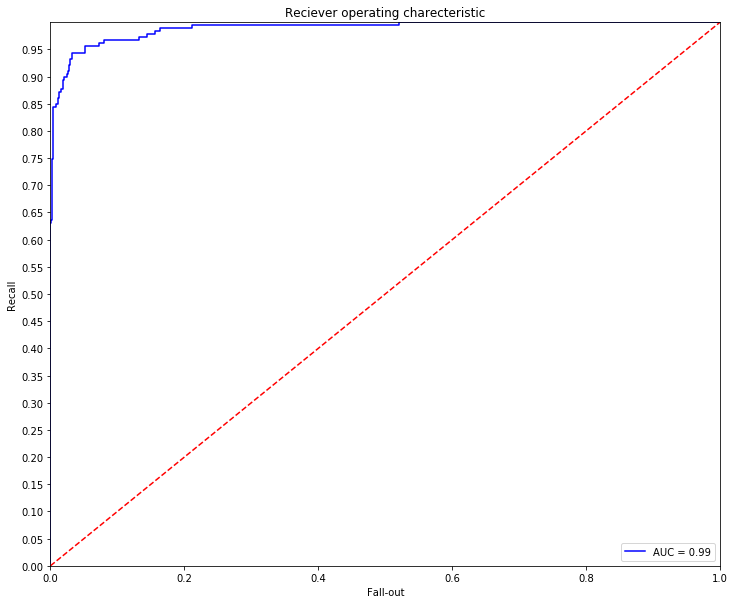

In [54]:
from sklearn.metrics import roc_curve, auc
fpr, recall, thlds = roc_curve( y_test, classifier.predict_proba(X_test)[:,1])
# print('False positive rate ',fpr[15:18],fpr[-3:])
# print(recall[15:18],recall[-3:])
# print(thlds[15:18],thlds[-3:])
roc_auc = auc(fpr,recall)
fig = figure()
plt.title('Reciever operating charecteristic')
plt.plot(fpr,recall,'b',label='AUC = %0.2f' % roc_auc )
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.yticks(np.arange(0.0,1.0,0.05))
plt.ylabel('Recall')
plt.xlabel('Fall-out')
fig.set_size_inches(12,10)

In [55]:
# rcurve = roc_curve( y_test, classifier.predict_proba(X_test)[:,1])
# rcurve
# ?filter
list(filter(lambda x : x[0] >= 0.7,zip(recall,fpr,thlds)))

[(0.7039106145251397, 0.0024691358024691358, 0.54849583081161746),
 (0.71508379888268159, 0.0024691358024691358, 0.53821056417277302),
 (0.74860335195530725, 0.0024691358024691358, 0.4928811949108779),
 (0.74860335195530725, 0.0032921810699588477, 0.48726971768072735),
 (0.76536312849162014, 0.0032921810699588477, 0.4667327926331965),
 (0.77653631284916202, 0.0032921810699588477, 0.45583176988988805),
 (0.7988826815642458, 0.0032921810699588477, 0.42745551812795912),
 (0.81005586592178769, 0.0032921810699588477, 0.42158725692120502),
 (0.83240223463687146, 0.0032921810699588477, 0.37875206087729635),
 (0.83240223463687146, 0.00411522633744856, 0.3747732986127752),
 (0.84357541899441346, 0.00411522633744856, 0.35653573848732389),
 (0.84357541899441346, 0.00823045267489712, 0.30880565476739968),
 (0.84916201117318435, 0.00823045267489712, 0.28431428423740662),
 (0.84916201117318435, 0.010699588477366255, 0.26960834222115515),
 (0.85474860335195535, 0.010699588477366255, 0.268229187661168

In [56]:
from collections import Counter
results = [1 if x[1]  > 0.45 else  0 for x in predict_prob]
print(Counter(zip(y_test,results)))
139/179

Counter({(0, 0): 1211, (1, 1): 139, (1, 0): 40, (0, 1): 4})


0.776536312849162

In [57]:
# Lets use grid search to find the best combination of parameters
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score

pipeline = Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', LogisticRegression())
    ])

parameters = {
    'vect__max_df' : (0.25, 0.50, 0.75),
    'vect__max_features' : (2500, 5000, 10000, None),
    'vect__norm' : ('l1', 'l2'),
    'clf__penalty' : ('l1', 'l2'),
    'clf__C' : (0.01, 0.1, 1,10)
}
grid_search = GridSearchCV(pipeline, parameters, verbose=1,
                           scoring='recall', cv=3,n_jobs=4)

df = pd.read_csv('sms.csv')

X_grid, y_grid =messages_cleaned, df['label']
X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(X_grid, y_grid)
grid_search.fit(X_train_grid, y_train_grid)

print ('Best score: %0.3f' % grid_search.best_score_)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   30.7s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   50.6s


Best score: 0.851


[Parallel(n_jobs=4)]: Done 576 out of 576 | elapsed:  1.4min finished


In [58]:
# Lets check the results
print( 'Best parameters set:' )
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted( parameters.keys()):
    print( '\t%s: %r' %( param_name, best_parameters[param_name]) )
predictions_grid = grid_search.predict(X_test_grid)
print( 'Accuracy: ', accuracy_score( y_test_grid, predictions_grid ) )
print( 'Precision: ', precision_score( y_test_grid, predictions_grid ) )
print( 'Recall: ', recall_score( y_test_grid, predictions_grid ) )

Best parameters set:
	clf__C: 10
	clf__penalty: 'l2'
	vect__max_df: 0.25
	vect__max_features: 2500
	vect__norm: 'l2'
Accuracy:  0.979913916786
Precision:  0.976608187135
Recall:  0.874345549738


In [59]:
# let us get the best estimator found by grid seach
clfg = grid_search.best_estimator_


In [61]:
# let us see how the best classifier performs
from sklearn.metrics import classification_report
grid_clf = clfg.fit(X_train_grid,y_train_grid)
clf_grid_predictions = grid_clf.predict(X_test_grid)
print(confusion_matrix(y_test, grid_clf.predict(X_test_grid)))
print(classification_report(y_test_grid,clf_grid_predictions))
print(accuracy_score(y_test_grid,clf_grid_predictions))

[[1071  144]
 [ 152   27]]
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      1203
          1       0.98      0.87      0.92       191

avg / total       0.98      0.98      0.98      1394

0.979913916786


In [63]:
# let us see the top features for the vectorizer
# we can call the steps on grid search to see the steps making up the pipeline
print(grid_clf.steps)
# The first step was the vectorizer and from the tuple the second value is the
# actual vecctorizer
grid_vect = grid_clf.steps[0][1]
print(type(grid_vect))

# let us see hte top features for the vectorizer
print ([ '{0}, {1:1.4f}'.format(x[0],x[1]) 
        for x in  sorted( zip(grid_vect.get_feature_names(), grid_vect.idf_), 
        key = lambda x : -x[1])[:50]])


[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.25, max_features=2500, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)), ('clf', LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]
<class 'sklearn.feature_extraction.text.TfidfVectorizer'>
['blah, 8.6452', 'bloo, 8.6452', 'crab, 8.6452', 'dsn, 8.6452', 'footprints, 8.6452', 'grl, 8.6452', 'horo, 8.6452', 'indians, 8.6452', 'interflora, 8.6452', 'jo, 8.6452', 'kiosk, 8.6452', 'lotr, 8.6452', 'luco

<h3><font color='blue'>===============================================</font></h3>
<h1>Naive Bayes</h1>

<h4>The probability of a bumper harvest post a good monsoon is greater than the probability of one at the beginning of the next sowing season</h4>

<h3>Bayes Theorem</h3>

<h4>$P ( A | B ) = \dfrac {P ( B | A ) P ( A )} {P ( B )} = \dfrac {P ( A \cap B )} {P( B )}$</h4>

<h4>In plain english:</h4>
<h4>$Posterior = \dfrac { prior \; x \; likelihood } {evidence}$</h4>
<h4>Classical spam example - lets say we have 100 messages out of which 20 of them are spam and out of the 10 messages that have the word free 8 have been characterized in the data preparation stage as spam. Then we have to find out what is the probability a message is spam if it includes the owrd free</h4>
<h4>So we have to find out P(spam|free) which will be equal to $\dfrac {P(free|spam) * P(spam)} {P(free)}$</h4>
<h4>i.e ( 8/20 X 20/100 ) / ( 10 / 100 ) - 80%</h4>
<h4>This is the conditional probability. Assuming independence we may have concuded that the probability is 8/20 - 40% only</h4>
<h4>If we want to find out probability of spam adding more conditionalities - say free - yes, grocery - no, offer - yes etc - we have to compute for various combinations</h4>
<h4>$P ( Spam | W 1 \cap ¬ W 2 \cap ¬ W 3 \cap W 4 ) = \dfrac{ P ( W 1 \cap ¬ W 2 \cap ¬ W 3 \cap W 4 \; | \;spam ) P ( spam ) } { P ( W1 \cap  ¬ W 2 \cap ¬ W 3 \cap W 4 )}$</h4> 
<h4>This is computationally infeasible</h4>
<h4>Naive Bayes makes the class conditional independence assumption that the conditional probabilites are independent if all the events are conditioned on the same class  and the formula becomes</h4>
<h4>$P ( Spam | W 1 \cap ¬ W 2 \cap ¬ W 3 \cap W 4 ) = \dfrac
{ P ( W 1 | spam ) P ( ¬ W 2 | spam ) P ( ¬ W 3 | spam ) P ( W 4 | spam ) P ( spam ) }
{ P ( W 1 ) P ( ¬ W 2 ) P ( ¬ W 3 ) P ( W 4 ) }$</h4>
<h4>Which is simpler and feasible to compute</h4>
<h3><font color='blue'>===============================================</font></h3>

<h3><font color='blue'>===============================================</font></h3>
<ul>
<li>We will follow the scikit learn steps</li>
<li>Initialize the classifier</li>
<li>Prepare the data - train, test splits</li>
<li>Fit the model</li>
<li>Make predictions</li>
<li>Measure performance</li>
<li>Run cross vaildation, grid search to boost model efficiency</li>
</ul>

<h3><font color='blue'>===============================================</font></h3>

In [64]:
import pandas as pd
from sklearn.feature_extraction.text import  TfidfVectorizer, CountVectorizer
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

df = pd.read_csv('sms.csv')
pipeline = Pipeline([
        ( 'vect', TfidfVectorizer()),
        ('clf', MultinomialNB())
    ])

X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split(messages_cleaned_and_stemmed,df['label'],
                                                               random_state=1000)
nbvectorizer = TfidfVectorizer()
X_train_MNB = nbvectorizer.fit_transform(X_train_NB)
X_test_MNB = nbvectorizer.transform(X_test_NB)
nbclassifier = MultinomialNB()
nbclassifier.fit(X_train_MNB.toarray(),y_train_NB)
predictions_MNB = nbclassifier.predict(X_test_MNB.toarray())
print ('The predictions from naive bayes ', predictions_MNB )
print ( 'The accuracy score from naive bayes', accuracy_score(y_test_NB,predictions_MNB) )
nb_scores = cross_val_score(nbclassifier,X_train_MNB.toarray(),y_train_NB,cv = 3,scoring='recall')
print ( 'The cross validated recall scores - the mean : ', np.mean(nb_scores),' and the scores ', nb_scores )
# here we will need the raw documents and not the transformed ones as we have
# the vectorizer in the pipeline
print (np.mean(cross_val_score(pipeline,X_train_NB,y_train_NB,cv=5,scoring='recall')))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


The predictions from naive bayes  [0 0 0 ..., 1 0 0]
The accuracy score from naive bayes 0.967718794835
The cross validated recall scores - the mean :  0.718240044556  and the scores  [ 0.758  0.714  0.683]
0.748175749107


In [65]:
np.unique(y_train_NB)
# The classes which are there in our data set
Y = np.unique(y_train_NB)
print('X_train_MNB shape is ', X_train_MNB.shape,  ' and y_train shape is ', y_train_NB.shape)
Y = y_train_NB.values.reshape(y_train_NB.shape[0],1)
Y = np.concatenate((1-Y, Y),axis=1)
print('y shape  after concatenation' , Y.shape)
n_features = X_train_MNB.shape[1]
n_effective_classes = Y.shape[1]
# we need to create the feature count for each of the classes
# so we do a dot product of the Y matrix and the train set design matrix
# we will have a feature count for each of the classes where each of the words
# will be feature for the vector
feature_count = (Y.T).dot(X_train_MNB.todense())

# add the alpha smoothing laplace adjustment a 1 across
smoothed_fc = feature_count + 1

# print('smoothed fc shape ',smoothed_fc.shape)
smoothed_cc = smoothed_fc.sum(axis=1)
print('smoothed_cc shape ', smoothed_cc.shape, ' smoothed_cc_reshaped shape ',
     smoothed_cc.reshape(-1, 1).shape)
# we estimate probabilities for each feature for each class 
# as its score divided by the total for the class
# we use log probabilities and subtract the log of the sum of the vector
# for the division operation
feature_log_prob = np.log(smoothed_fc) - np.log(smoothed_cc.reshape(-1,1))
print('feature log prob shape ' , feature_log_prob.shape , ' and the first element',
      feature_log_prob[0])
print('feature log prob from the classifier shape ', nbclassifier.feature_log_prob_.shape,'\
and the first element ', nbclassifier.feature_log_prob_[0])
print('\nThe log probabilities and the predictions as per argmax\n')
print([x for x in zip(nbclassifier.predict_log_proba(X_test_MNB)[:10],
                     nbclassifier.predict(X_test_MNB)[:10])])
# Let us get the predictions ourselves
# Get the joint probability for the test set using feature_log_prob
# Xtest joint log likelihood
Xtest_jll = X_test_MNB.dot(feature_log_prob.T)
# Let us get the prior log probabilities for the classes using the training set
class_log_prior = np.log(np.bincount(y_train_NB)) - np.log(np.bincount(y_train_NB).sum())
print('The class log priros we have got -', class_log_prior, 
      ' and the ones for the classifier -', nbclassifier.class_log_prior_)
predictions_calc = Xtest_jll + class_log_prior

print([x for x in zip (predictions_MNB[:10],
                       np.array(np.argmax(predictions_calc,axis=1)[:10]).flatten()) ] )
# nbclassifier.
# nbclassifier.feature_log_prob_.dot(X_test_MNB.todense().T)[:5]

X_train_MNB shape is  (4180, 5401)  and y_train shape is  (4180,)
yshape  after concatenation (4180, 2)
smoothed_cc shape  (2, 1)  smoothed_cc_reshaped shape  (2, 1)
feature log prob shape  (2, 5401)  and the first element [[-9.259 -8.881 -8.935 ..., -9.3   -9.566 -9.566]]
feature log prob from the classifier shape  (2, 5401) and the first element  [-9.259 -8.881 -8.935 ..., -9.3   -9.566 -9.566]

The log probabilities and the predictions as per argmax

[(array([-0.007, -4.925]), 0), (array([-0.059, -2.859]), 0), (array([-0.223, -1.609]), 0), (array([-0.056, -2.906]), 0), (array([-0.008, -4.849]), 0), (array([ -4.145e-03,  -5.488e+00]), 0), (array([-0.044, -3.148]), 0), (array([-0.933, -0.5  ]), 1), (array([-0.008, -4.864]), 0), (array([-0.146, -1.996]), 0)]
The class log priros we have got - [-0.146 -1.996]  and the ones for the classifier - [-0.146 -1.996]
[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0)]


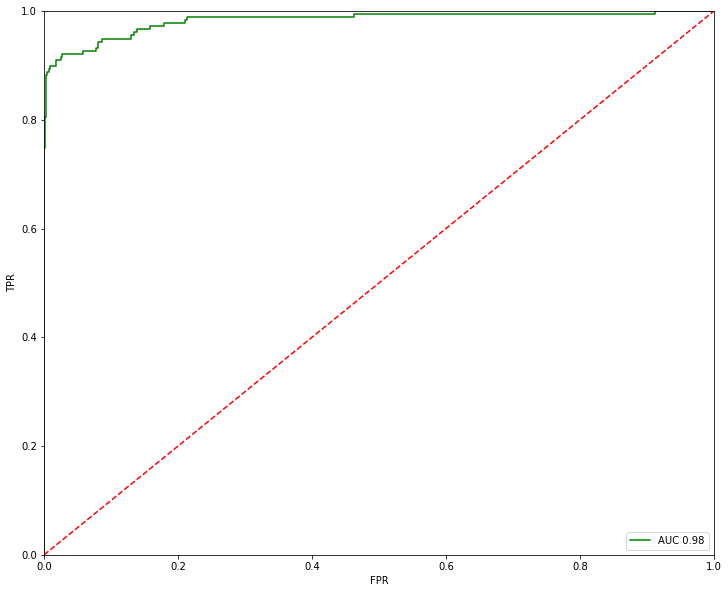

In [66]:
nbpredicts = nbclassifier.predict_proba(X_test_MNB)[:,1]
fpr_nb,recall_nb,th_nb = roc_curve(y_test_NB,nbpredicts)
auc_nb = auc(fpr_nb,recall_nb)
fig = figure()
plt.plot(fpr_nb,recall_nb,'g',label='AUC %0.2f' % auc_nb )
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
plt.xlabel('FPR')
plt.ylabel('TPR')

fig.set_size_inches(12,10)